This notebook looks at binary classification on the handwriten digits zero and one, other digits are discarded. The dataset used is a scaled down version on MNIST. 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import torch

from raytracerthing import RayTracerThing, Activations

np.random.seed(42)

In [2]:
digits = load_digits()
digits.keys()

y = digits['target']

X = digits['images']
X = X[y < 2]
X = X / X.max()
N = X.shape[0]
image_shape = X.shape[1:]

print(N, image_shape)

y = y[y < 2]

print(y[:5])

360 (8, 8)
[0 1 0 1 0]


In [3]:
np.unique(y, return_counts=True)

(array([0, 1]), array([178, 182]))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
%%time

clf = RayTracerThing(input_shape=image_shape,
                     hidden_layer_shape=(8, 8), 
                     n_hidden_layers=3,
                     n_classes=2,
                     activation_func=Activations.softmax,
                     loss_func=torch.nn.functional.cross_entropy,
                     learning_rate=1)

CPU times: user 125 ms, sys: 0 ns, total: 125 ms
Wall time: 129 ms


In [6]:
%time clf.fit(X_train, y_train, batch_size=16, n_epochs=1000, early_stopping_epsilon=1e-5)

Epoch 1 of 1000 - train_loss: 0.4412 - train_acc: 0.9125 - val_loss: 0.3776 - val_acc: 0.9655
Epoch 2 of 1000 - train_loss: 0.3471 - train_acc: 0.9958 - val_loss: 0.3516 - val_acc: 0.9828
Epoch 3 of 1000 - train_loss: 0.3356 - train_acc: 1.0000 - val_loss: 0.3429 - val_acc: 0.9828
Epoch 4 of 1000 - train_loss: 0.3310 - train_acc: 1.0000 - val_loss: 0.3379 - val_acc: 0.9828
Epoch 5 of 1000 - train_loss: 0.3282 - train_acc: 1.0000 - val_loss: 0.3345 - val_acc: 0.9828
Epoch 6 of 1000 - train_loss: 0.3263 - train_acc: 1.0000 - val_loss: 0.3324 - val_acc: 0.9828
Epoch 7 of 1000 - train_loss: 0.3252 - train_acc: 1.0000 - val_loss: 0.3311 - val_acc: 0.9828
Epoch 8 of 1000 - train_loss: 0.3245 - train_acc: 1.0000 - val_loss: 0.3300 - val_acc: 1.0000
Epoch 9 of 1000 - train_loss: 0.3239 - train_acc: 1.0000 - val_loss: 0.3290 - val_acc: 1.0000
Epoch 10 of 1000 - train_loss: 0.3234 - train_acc: 1.0000 - val_loss: 0.3282 - val_acc: 1.0000
Epoch 11 of 1000 - train_loss: 0.3230 - train_acc: 1.0000 -

Epoch 87 of 1000 - train_loss: 0.3184 - train_acc: 1.0000 - val_loss: 0.3199 - val_acc: 1.0000
Epoch 88 of 1000 - train_loss: 0.3184 - train_acc: 1.0000 - val_loss: 0.3199 - val_acc: 1.0000
Epoch 89 of 1000 - train_loss: 0.3183 - train_acc: 1.0000 - val_loss: 0.3199 - val_acc: 1.0000
Epoch 90 of 1000 - train_loss: 0.3183 - train_acc: 1.0000 - val_loss: 0.3199 - val_acc: 1.0000
Epoch 91 of 1000 - train_loss: 0.3183 - train_acc: 1.0000 - val_loss: 0.3198 - val_acc: 1.0000
Epoch 92 of 1000 - train_loss: 0.3183 - train_acc: 1.0000 - val_loss: 0.3198 - val_acc: 1.0000
Epoch 93 of 1000 - train_loss: 0.3183 - train_acc: 1.0000 - val_loss: 0.3198 - val_acc: 1.0000
Epoch 94 of 1000 - train_loss: 0.3183 - train_acc: 1.0000 - val_loss: 0.3198 - val_acc: 1.0000
Epoch 95 of 1000 - train_loss: 0.3183 - train_acc: 1.0000 - val_loss: 0.3198 - val_acc: 1.0000
Epoch 96 of 1000 - train_loss: 0.3183 - train_acc: 1.0000 - val_loss: 0.3198 - val_acc: 1.0000
Epoch 97 of 1000 - train_loss: 0.3183 - train_acc:

Epoch 172 of 1000 - train_loss: 0.3179 - train_acc: 1.0000 - val_loss: 0.3195 - val_acc: 1.0000
Epoch 173 of 1000 - train_loss: 0.3179 - train_acc: 1.0000 - val_loss: 0.3195 - val_acc: 1.0000
Epoch 174 of 1000 - train_loss: 0.3179 - train_acc: 1.0000 - val_loss: 0.3195 - val_acc: 1.0000
Epoch 175 of 1000 - train_loss: 0.3179 - train_acc: 1.0000 - val_loss: 0.3195 - val_acc: 1.0000
Epoch 176 of 1000 - train_loss: 0.3179 - train_acc: 1.0000 - val_loss: 0.3195 - val_acc: 1.0000
Epoch 177 of 1000 - train_loss: 0.3179 - train_acc: 1.0000 - val_loss: 0.3195 - val_acc: 1.0000
Epoch 178 of 1000 - train_loss: 0.3178 - train_acc: 1.0000 - val_loss: 0.3195 - val_acc: 1.0000
Epoch 179 of 1000 - train_loss: 0.3178 - train_acc: 1.0000 - val_loss: 0.3195 - val_acc: 1.0000
Epoch 180 of 1000 - train_loss: 0.3178 - train_acc: 1.0000 - val_loss: 0.3195 - val_acc: 1.0000
Epoch 181 of 1000 - train_loss: 0.3178 - train_acc: 1.0000 - val_loss: 0.3195 - val_acc: 1.0000
Epoch 182 of 1000 - train_loss: 0.3178 -

Epoch 257 of 1000 - train_loss: 0.3176 - train_acc: 1.0000 - val_loss: 0.3193 - val_acc: 1.0000
Epoch 258 of 1000 - train_loss: 0.3176 - train_acc: 1.0000 - val_loss: 0.3193 - val_acc: 1.0000
Epoch 259 of 1000 - train_loss: 0.3176 - train_acc: 1.0000 - val_loss: 0.3193 - val_acc: 1.0000
Epoch 260 of 1000 - train_loss: 0.3176 - train_acc: 1.0000 - val_loss: 0.3193 - val_acc: 1.0000
Epoch 261 of 1000 - train_loss: 0.3176 - train_acc: 1.0000 - val_loss: 0.3193 - val_acc: 1.0000
Epoch 262 of 1000 - train_loss: 0.3176 - train_acc: 1.0000 - val_loss: 0.3193 - val_acc: 1.0000
Epoch 263 of 1000 - train_loss: 0.3176 - train_acc: 1.0000 - val_loss: 0.3193 - val_acc: 1.0000
Epoch 264 of 1000 - train_loss: 0.3176 - train_acc: 1.0000 - val_loss: 0.3193 - val_acc: 1.0000
Epoch 265 of 1000 - train_loss: 0.3176 - train_acc: 1.0000 - val_loss: 0.3193 - val_acc: 1.0000
Epoch 266 of 1000 - train_loss: 0.3176 - train_acc: 1.0000 - val_loss: 0.3193 - val_acc: 1.0000
Epoch 267 of 1000 - train_loss: 0.3176 -

Epoch 342 of 1000 - train_loss: 0.3174 - train_acc: 1.0000 - val_loss: 0.3191 - val_acc: 1.0000
Epoch 343 of 1000 - train_loss: 0.3174 - train_acc: 1.0000 - val_loss: 0.3191 - val_acc: 1.0000
Epoch 344 of 1000 - train_loss: 0.3174 - train_acc: 1.0000 - val_loss: 0.3191 - val_acc: 1.0000
Epoch 345 of 1000 - train_loss: 0.3174 - train_acc: 1.0000 - val_loss: 0.3191 - val_acc: 1.0000
Epoch 346 of 1000 - train_loss: 0.3174 - train_acc: 1.0000 - val_loss: 0.3191 - val_acc: 1.0000
Decreasing learning rate to 0.0100
Epoch 347 of 1000 - train_loss: 0.3174 - train_acc: 1.0000 - val_loss: 0.3191 - val_acc: 1.0000
Epoch 348 of 1000 - train_loss: 0.3174 - train_acc: 1.0000 - val_loss: 0.3191 - val_acc: 1.0000
Epoch 349 of 1000 - train_loss: 0.3174 - train_acc: 1.0000 - val_loss: 0.3191 - val_acc: 1.0000
Epoch 350 of 1000 - train_loss: 0.3174 - train_acc: 1.0000 - val_loss: 0.3191 - val_acc: 1.0000
Epoch 351 of 1000 - train_loss: 0.3174 - train_acc: 1.0000 - val_loss: 0.3191 - val_acc: 1.0000
Epoch

In [7]:
y_pred = clf.predict(X_test)

In [8]:
clf.score(X_test, y_test)

tensor(1.)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        35
          1       1.00      1.00      1.00        37

avg / total       1.00      1.00      1.00        72



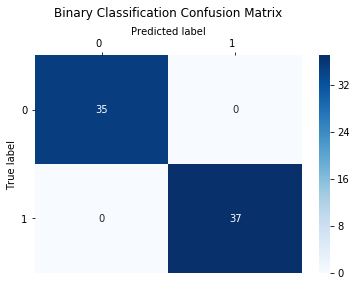

In [10]:
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(), rotation=0, ha='right')
cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(), rotation=0, ha='right')
cm.xaxis.tick_top()
cm.xaxis.set_label_position('top')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Binary Classification Confusion Matrix', y=1.15)
plt.savefig('images/binary_classification_confusion_matrix.png')

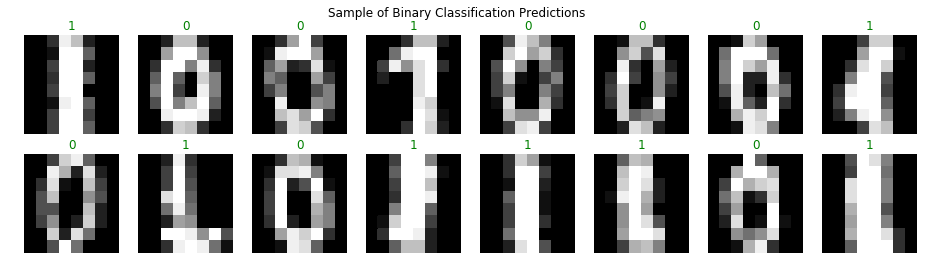

In [11]:
n_rows = 2
n_cols = 8
n_total = n_rows * n_cols
n_total = min(n_total, N)

width_ratio = 2
height_ratio = 2

figsize = (int(width_ratio * n_cols), int(height_ratio * n_rows))

fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
axes = axes.ravel()

for ax, image, expected, actual in zip(axes, X_test[:n_total], y_test[:n_total], y_pred[:n_total]):
    sns.heatmap(image, cbar=False, cmap='gray', ax=ax)
    ax.set_axis_off()

    color = 'green' if expected == actual else 'red'
    ax.set_title('%d' % actual, color=color)

plt.suptitle('Sample of Binary Classification Predictions')
plt.savefig('images/binary_classification_prediction_sample.png')

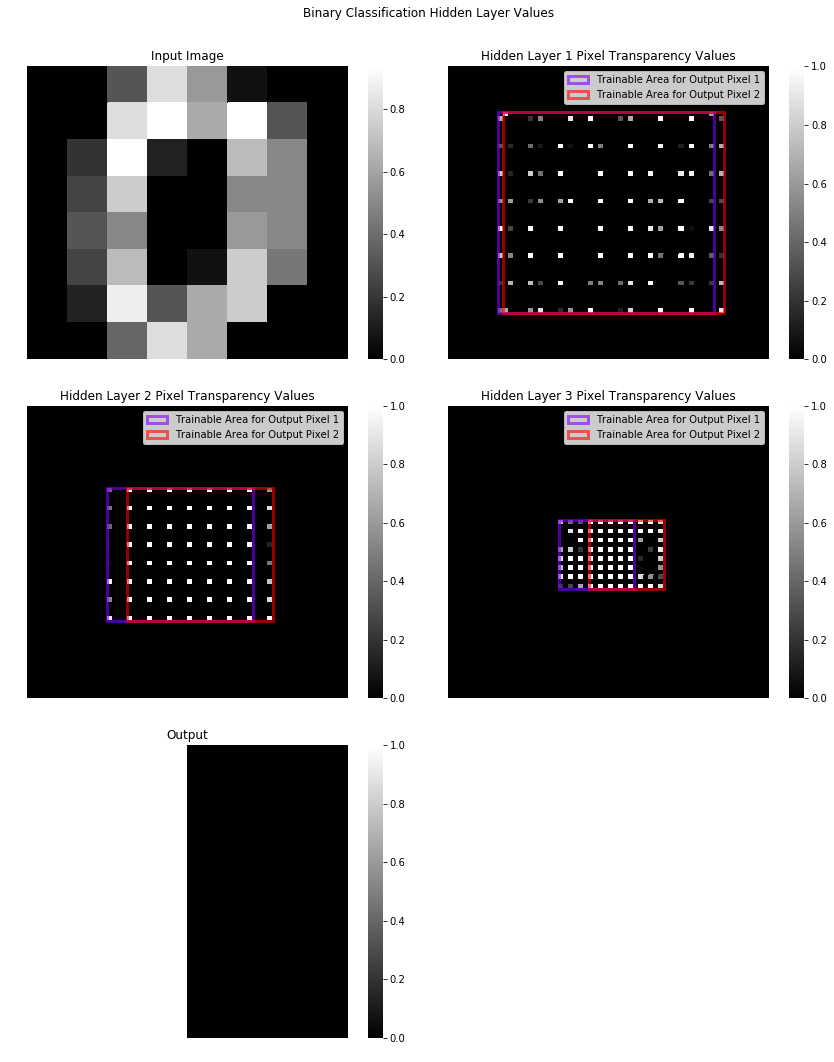

In [12]:
colors = plt.cm.rainbow(np.linspace(0, 1, clf.output_layer.n_rows * clf.output_layer.n_cols))

n_layers = 2 + clf.n_hidden_layers
n_cols = 2
n_rows = n_layers // 2

if n_layers % 2 > 0:
    n_rows += 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 15))
axes = axes.ravel()

ax = sns.heatmap(X[0], cmap='gray', ax=axes[0])
ax.set(title='Input Image')
ax.set_axis_off()

for (i, layer), ax in zip(enumerate(clf.hidden_layers), axes[1:-1]):
    ax = sns.heatmap(layer.pixel_values, vmin=0, cmap='gray', ax=ax)
        
    for row in range(clf.output_layer.n_rows):
        for col in range(clf.output_layer.n_cols):
            trained_pixels = clf.grid_W_map[row][col][i].keys() 

            min_extent = clf.hidden_layer_shape
            max_extent = (0, 0)

            for grid_coord in trained_pixels:
                grid_row, grid_col = grid_coord

                if grid_row < min_extent[0]:
                    min_extent = (grid_row, min_extent[1])

                if grid_row > max_extent[0]:
                    max_extent = (grid_row, max_extent[1])

                if grid_col < min_extent[1]:
                    min_extent = (min_extent[0], grid_col)

                if grid_col > max_extent[1]:
                    max_extent = (max_extent[0], grid_col)

            height = (max_extent[0] - min_extent[0]) + 1
            width = (max_extent[1] - min_extent[1]) + 1
            
            rect = patches.Rectangle((min_extent[1], min_extent[0]), width, height, 
                                     linewidth=3, alpha=0.6, edgecolor=colors[col], facecolor='none', 
                                     label='Trainable Area for Output Pixel %d' % (col + 1))

            ax.add_patch(rect)
            
        ax.set_axis_off()
        ax.set(title='Hidden Layer %d Pixel Transparency Values' % (i + 1))
        ax.legend()
        
ax = sns.heatmap(clf.predict_proba(X).detach().numpy()[0].reshape(1, -1), vmin=0, vmax=1, cmap='gray', ax=axes[n_layers - 1])
ax.set(title='Output')
ax.set_axis_off()

if n_layers % 2 > 0:
    fig.delaxes(axes[-1])

plt.suptitle('Binary Classification Hidden Layer Values')
plt.tight_layout(rect=(0, 0, 1, 0.95))
plt.savefig('images/binary_classification_hidden_layer_values.png')